In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset/Salary_Data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
# ml
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('/kaggle/input/salary-dataset/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
fig = px.scatter(df['YearsExperience'],df['Salary'])
fig.show()

### Assign x,y

In [6]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


In [7]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [8]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

### Split Data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=.20)

In [11]:
X_train

array([[ 1.5],
       [ 7.1],
       [ 4. ],
       [ 2.2],
       [10.3],
       [ 6. ],
       [ 4.9],
       [ 9.6],
       [ 7.9],
       [ 9.5],
       [ 1.3],
       [ 8.7],
       [ 5.1],
       [ 2.9],
       [ 6.8],
       [ 3. ],
       [ 8.2],
       [ 9. ],
       [ 4.1],
       [ 4.5],
       [ 5.3],
       [ 4. ],
       [10.5],
       [ 5.9]])

In [12]:
X_test

array([[3.7],
       [3.9],
       [2. ],
       [3.2],
       [1.1],
       [3.2]])

### Build Model

In [13]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [14]:
y_test

array([57189., 63218., 43525., 64445., 39343., 54445.])

In [15]:
y_pred = model.predict(X_test)
y_pred

array([60239.51888486, 62154.19756435, 43964.7501092 , 55452.82218614,
       35348.6960515 , 55452.82218614])

### Visualize 

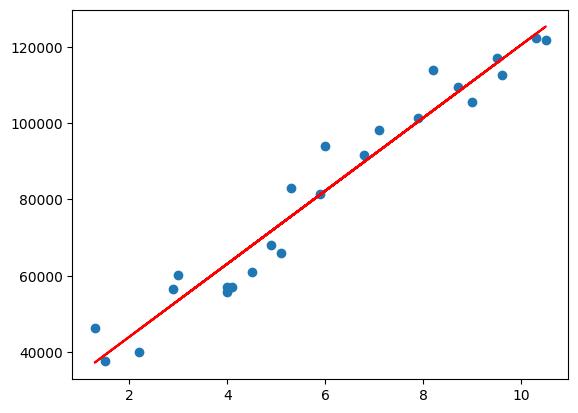

In [16]:
plt.scatter(X_train,y_train)
plt.plot(X_train,model.predict(X_train),color='red')

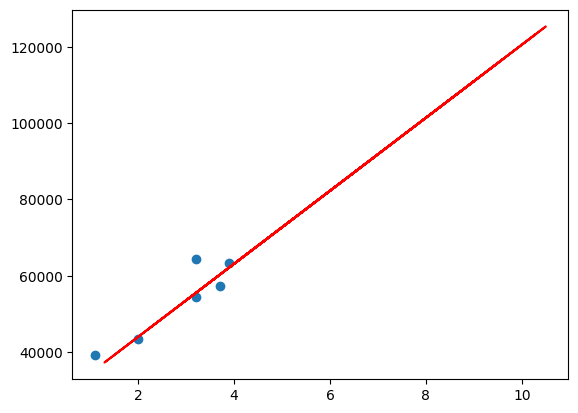

In [17]:
plt.scatter(X_test , y_test)
plt.plot(X_train , model.predict(X_train) , color='red')

In [18]:
model.coef_

array([9573.39339745])

In [19]:
model.intercept_

24817.963314313136

In [20]:
df2 = pd.DataFrame({'Actuall':y_test.flatten() , 'predicted' : y_pred.flatten()})
df2

,Actuall,predicted
0,57189.0,60239.518885
1,63218.0,62154.197564
2,43525.0,43964.750109
3,64445.0,55452.822186
4,39343.0,35348.696052
5,54445.0,55452.822186


<Axes: >

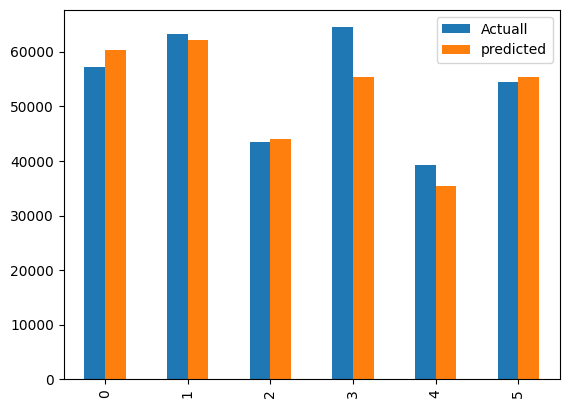

In [21]:
df2.plot(kind='bar')